In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install numpy
#from google.colab import drive
#drive.mount("/content/drive")

import os
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import random
import cv2


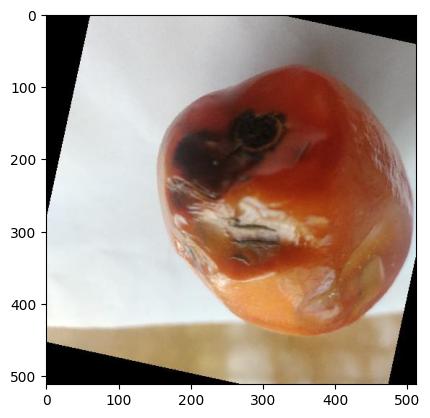

In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread("/content/drive/MyDrive/final_tomato_except2/data/user_feed/rotten01.jpg")
#img = mpimg.imread("C:/Users/TRIVICO/tomato_except2/data/user_feed/rotten01.jpg")
plt.imshow(img)
plt.show()

In [ ]:
import os
import pandas as pd
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array, load_img


# define the directory containing the TB folder
#main_dir = "C:/Users/jnrda/Documents/projects/images"
main_dir = "/content/drive/MyDrive/final_tomato_except2/data"


# define the sub-directories containing the healthy and TB images
fresh_dir = os.path.join(main_dir, "fresh")
#others_dir = os.path.join(main_dir, "Others")
not_fresh_dir = os.path.join(main_dir, "not_fresh")
unidentified_dir = os.path.join(main_dir, "unidentified")
#rotten_dir = os.path.join(main_dir, "rotten")

# defining the classes and class indices
classes = ["fresh", "at_risk","rotten"]
class_indices = {"fresh": 0,  "at_risk": 1,"rotten":2}

# create a list to store the image paths and labels
data = {"path": [], "class_index": [], "class": []}

# loop through the healthy images
for img_name in os.listdir(fresh_dir):
    img_path = os.path.join(fresh_dir, img_name)
    data["path"].append(img_path)
    data["class_index"].append(class_indices["fresh"])
    data["class"].append("fresh")

# # loop through the others images
# for img_name in os.listdir(others_dir):
#     img_path = os.path.join(others_dir, img_name)
#     data["path"].append(img_path)
#     data["class_index"].append(class_indices["Others"])
#     data["class"].append("Others")

# loop through the healthy images
for img_name in os.listdir(unidentified_dir):
    img_path = os.path.join(unidentified_dir, img_name)
    data["path"].append(img_path)
    data["class_index"].append(class_indices["unidentified"])
    data["class"].append("unidentified")  

# loop through the not fresh images
for not_fresh_type in os.listdir(not_fresh_dir):
    if not_fresh_type == ".ipynb_checkpoints":
        continue
    not_fresh_type_dir = os.path.join(not_fresh_dir, not_fresh_type)
    if not os.path.isdir(not_fresh_type_dir):
        continue
    label = class_indices[not_fresh_type]
    for img_name in os.listdir(not_fresh_type_dir):
        img_path = os.path.join(not_fresh_type_dir, img_name)
        data["path"].append(img_path)
        data["class_index"].append(label)
        data["class"].append(not_fresh_type)


# create a DataFrame from the image paths and labels
df = pd.DataFrame(data)

# preview the DataFrame
print(df[100:])
# df['Healthy'].dtypes

                                                   path  class_index   class
100   /content/drive/MyDrive/final_tomato_except2/da...            0   fresh
101   /content/drive/MyDrive/final_tomato_except2/da...            0   fresh
102   /content/drive/MyDrive/final_tomato_except2/da...            0   fresh
103   /content/drive/MyDrive/final_tomato_except2/da...            0   fresh
104   /content/drive/MyDrive/final_tomato_except2/da...            0   fresh
...                                                 ...          ...     ...
8995  /content/drive/MyDrive/final_tomato_except2/da...            2  rotten
8996  /content/drive/MyDrive/final_tomato_except2/da...            2  rotten
8997  /content/drive/MyDrive/final_tomato_except2/da...            2  rotten
8998  /content/drive/MyDrive/final_tomato_except2/da...            2  rotten
8999  /content/drive/MyDrive/final_tomato_except2/da...            2  rotten

[8900 rows x 3 columns]


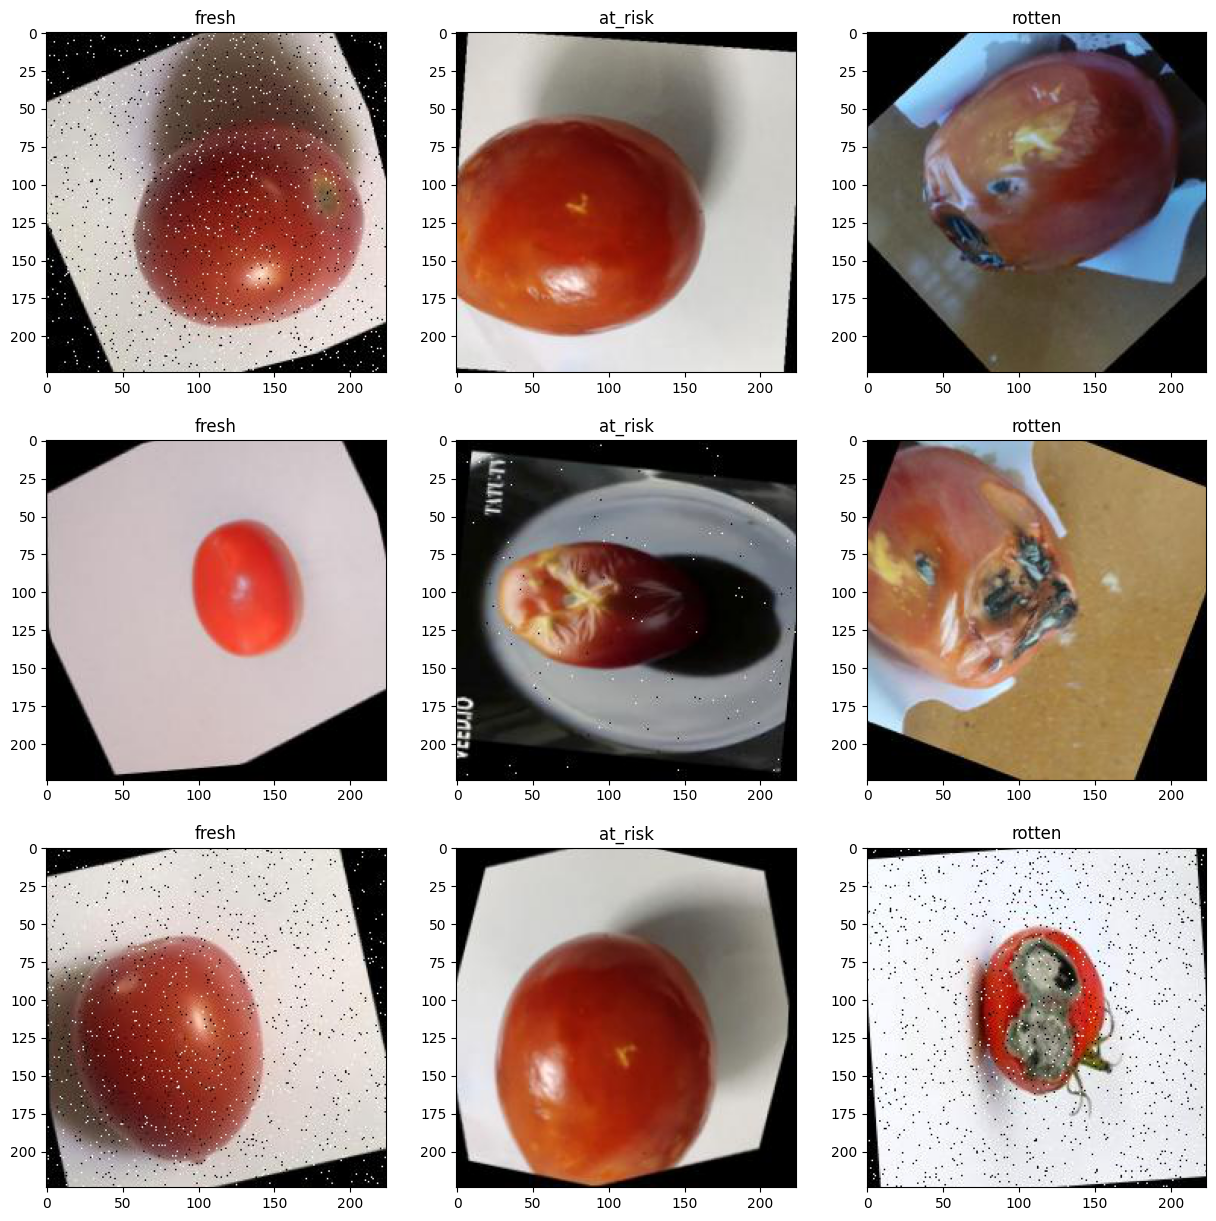

In [ ]:
labels_for_viz ={
                    "0":"fresh", 
                    #"1":"Others",
                    "1":"at_risk",
                    "2":"rotten",
                }

n = 3 # number of images per column per class
m = len(class_indices)
fig, ax = plt.subplots(n, m, figsize=(15, 5*n))

for j, class_index in enumerate(class_indices.values()):
    class_data = df.loc[df["class_index"] == class_index]
    class_data = class_data.reset_index(drop=True)
    for i in range(n):
        sample = random.randint(0, len(class_data)-1)
        img_path = class_data.loc[sample, "path"]
        img = load_img(img_path, target_size=(224, 224))
        ax[i][j].imshow(img)
        ax[i][j].set_title(labels_for_viz[str(class_index)])
    # fill remaining rows with black images if there are not enough samples
    if len(class_data) < n:
        for k in range(len(class_data), n):
            ax[k][j].imshow(np.zeros((224,224,3)))


(array([0, 1, 2]),
 [Text(0, 0, 'fresh'), Text(1, 0, 'at_risk'), Text(2, 0, 'rotten')])

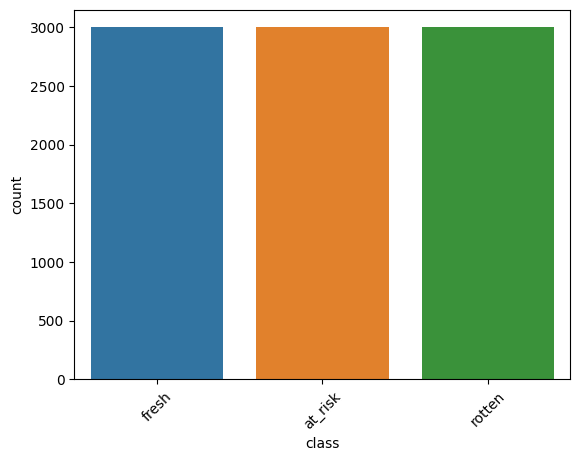

In [ ]:
#!pip install seaborn
import seaborn as sns

sns.countplot(x="class", data=df, dodge=0.1)
plt.xticks(rotation=45)


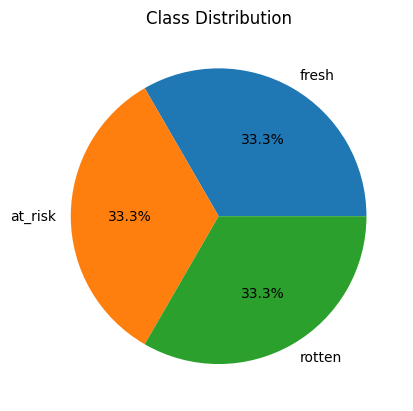

In [ ]:
# Get the count of samples in each class
class_count = df['class'].value_counts()

# Plot the pie chart
plt.pie(class_count, labels=class_count.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()


In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import numpy as np

In [ ]:
# Shuffle the dataset randomly
df = df.sample(frac=1, random_state=42)

# Split the dataset into training, validation, and test sets
train_df = df[:int(0.8 * len(df))]
val_test_df = df[int(0.8 * len(df)):]

# Split the validation and test sets
valid_df = val_test_df[:int(0.5 * len(val_test_df))]
test_df = val_test_df[int(0.5 * len(val_test_df)):]

# Print the shapes of the resulting DataFrames
print('Train:', train_df.shape)
print('Validation:', valid_df.shape)
print('Test:', test_df.shape)

Train: (7200, 3)
Validation: (900, 3)
Test: (900, 3)


In [ ]:
# Step 2: Split the data into training, validation, and test sets
#train_df = df.sample(frac=1, random_state=42)
#valid_df = df.drop(train_df.index).sample(frac=0.5, random_state=42)
#test_df = df.drop(train_df.index).drop(valid_df.index)

In [ ]:
print(len(test_df))
print(len(valid_df))
print(len(train_df))

900
900
7200


In [ ]:
# Step 3: Data preprocessing
batch_size=32
train_datagen = ImageDataGenerator(rescale=1./255,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              horizontal_flip=True,
                              vertical_flip=False)

#train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="path",
    y_col="class",
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode="categorical"
)


val_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = val_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col="path",
    y_col="class",
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="path",
    y_col="class",
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 7200 validated image filenames belonging to 3 classes.
Found 900 validated image filenames belonging to 3 classes.
Found 900 validated image filenames belonging to 3 classes.


In [ ]:
print(train_generator.class_indices)
print(valid_generator.class_indices)
print(test_generator.class_indices)

{'at_risk': 0, 'fresh': 1, 'rotten': 2}
{'at_risk': 0, 'fresh': 1, 'rotten': 2}
{'at_risk': 0, 'fresh': 1, 'rotten': 2}


In [ ]:
# from keras.applications.vgg16 import VGG16
# from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Flatten
import tensorflow as tf

#import Xception model
model = tf.keras.applications.Xception(
    # false so i can use my own top layer or inputs
    include_top=False, 
    
    #user their pre-trained model weights
    weights="imagenet",
    
    #3D : height-weidth-rgb or gray
    input_shape=(224,224,3),
    classes=3,
)
model.summary()

83683744/83683744 [==============================] - 4s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                   

In [ ]:
# lock layers
for layer in model.layers:
  layer.trainable = False

# set full connect layers
x = layers.Flatten()(model.output)  # 1hotencoding (from different arrays to 1 single container or array)
#x = model.output
#x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.1)(x) # Control my overfitting (some add a layer after every layer in case you have many layers)
x = layers.Dense(256, activation= 'relu')(x) # Dense layer (towards output) : from 8x...
x = layers.Dense(3, activation = 'softmax')(x) # multiclass = softmax = number of class sigmoid for binary

model=tf.keras.Model(model.input,x)

# # setting the first seventeen layers to not trianable
# for layer in model.layers[:17]:
#     layer.trainable = False


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [ ]:
import numpy as np
from sklearn.utils import class_weight
import numpy as np
from sklearn.utils import class_weight
from sklearn.utils import class_weight

unique_classes = list(df["class_index"].unique())
unique_classes

# step 5a: Calculate class weights


# for i in range(3):
#     class_weights[i] = len(df) / (3 * np.bincount(df['class_index'])[i])

class_weights = {}
for classes in unique_classes:
  class_weights[classes] = df.shape[0]/((df.loc[df["class_index"]== classes].shape[0]) * len(unique_classes))

print(class_weights)

{2: 1.0, 0: 1.0, 1: 1.0}


In [ ]:
#print(train_labels)

In [ ]:
from tensorflow.keras.optimizers import Adam
import numpy as np
import scipy
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# from keras.callbacks import EarlyStopping, ModelCheckpoint
from datetime import datetime

# filepath = "/content/drive/MyDrive/models/Xception1_model.h5"
# #saving the best model and model checkpoint
# mc = ModelCheckpoint(filepath = filepath, monitor="validation_accuracy", verbose=2, save_best_only=True, mode="auto", save_weights_only=False)
# #early stoppoing
# es = EarlyStopping(monitor = "validation_loss", verbose=2, patience=6, mode="auto")



# callbacks = [mc, es]

# keeping track of runtime
start = datetime.now()

In [ ]:
# Step 6: Train the model
history = model.fit(
    train_generator,
    steps_per_epoch = 10,
    validation_data=valid_generator,
    validation_steps = 10,
    epochs=200,
    verbose=1,
    class_weight=class_weights,
#     callbacks = callbacks
)

# Save the trained model
MODEL_NAME = 'final_project_200_tomatos'
model.save(f'{MODEL_NAME}.h5')

# keeping track of runtime
duration = datetime.now() - start 
print("Training completed in Time: ", duration)

Epoch 1/200
10/10 [==============================] - 395s 40s/step - loss: 20.7178 - accuracy: 0.5094 - val_loss: 2.7077 - val_accuracy: 0.6656
Epoch 2/200
10/10 [==============================] - 290s 30s/step - loss: 2.1736 - accuracy: 0.6938 - val_loss: 0.6811 - val_accuracy: 0.8000
Epoch 3/200
10/10 [==============================] - 238s 25s/step - loss: 0.6129 - accuracy: 0.8188 - val_loss: 0.6131 - val_accuracy: 0.8250
Epoch 4/200
10/10 [==============================] - 205s 21s/step - loss: 0.4071 - accuracy: 0.8594 - val_loss: 0.4185 - val_accuracy: 0.8750
Epoch 5/200
10/10 [==============================] - 167s 17s/step - loss: 0.3448 - accuracy: 0.8875 - val_loss: 0.5114 - val_accuracy: 0.8313
Epoch 6/200
10/10 [==============================] - 157s 16s/step - loss: 0.4451 - accuracy: 0.8656 - val_loss: 0.3421 - val_accuracy: 0.8906
Epoch 7/200
10/10 [==============================] - 145s 15s/step - loss: 0.4164 - accuracy: 0.8875 - val_loss: 0.3043 - val_accuracy: 0.906

In [ ]:
# step 1: exporting the accuracy and loss of the train and validation set as CSV
import csv

def export_to_csv(history, file_name):
    with open(file_name, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['epoch', 'loss', 'val_loss', 'accuracy', 'val_accuracy'])
        for epoch in range(len(history.history['loss'])):
            writer.writerow([epoch + 1, history.history['loss'][epoch], history.history['val_loss'][epoch],
                             history.history['accuracy'][epoch], history.history['val_accuracy'][epoch]])

# Example usage:
export_to_csv(history, 'fianl_training_metrics.csv')

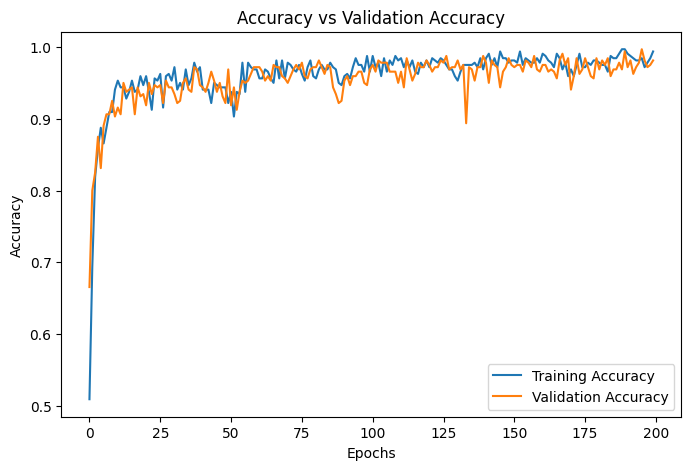

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8, 5))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Validation Accuracy')
plt.legend()
plt.show()

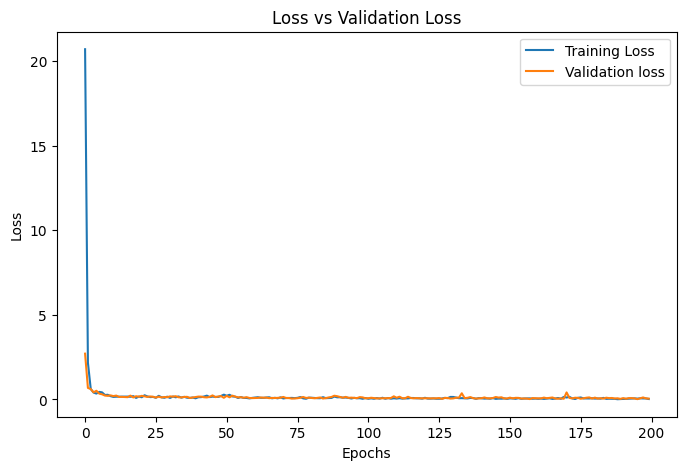

In [ ]:
acc = history.history['loss']
val_acc = history.history['val_loss']

plt.figure(figsize=(8, 5))
plt.plot(acc, label='Training Loss')
plt.plot(val_acc, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Validation Loss')
plt.legend()
plt.show()

In [ ]:
import seaborn as sns

29/29 [==============================] - 497s 18s/step
              precision    recall  f1-score   support

     at_risk     0.9770    0.9900    0.9835       301
       fresh     0.9860    0.9825    0.9842       286
      rotten     0.9968    0.9872    0.9920       313

    accuracy                         0.9867       900
   macro avg     0.9866    0.9866    0.9866       900
weighted avg     0.9867    0.9867    0.9867       900



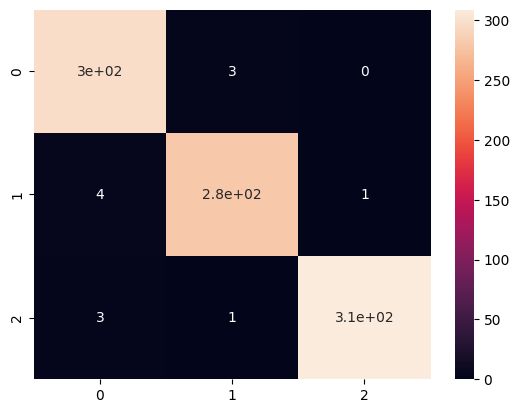

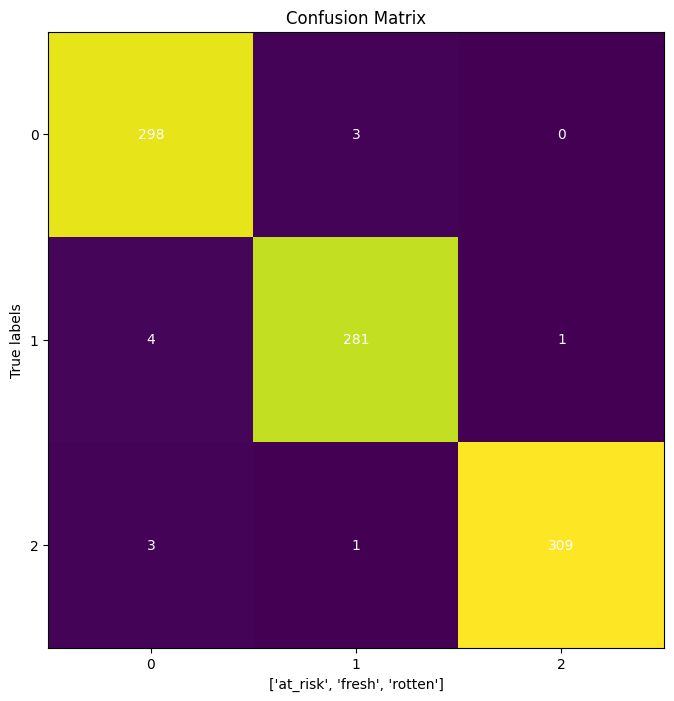

In [ ]:
#step 4: plotting the scatter plot for the evaluation of the model on the test set

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Assuming your model is stored in a variable named `model`
# and `test_generator` is your test set
y_true = test_generator.classes
y_pred = model.predict(test_generator)

# Convert probabilities to class predictions
y_pred = y_pred.argmax(axis=1)

# Generate classification report
target_names = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=target_names, digits=4)

# Print classification report
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm,annot=True)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel(target_names, loc='center')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set(ticks=range(len(target_names)))
ax.yaxis.set(ticks=range(len(target_names)))
for i in range(len(target_names)):
    for j in range(len(target_names)):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()



In [ ]:

def names(number):
    if number==0:
        return "It's a half rotten Tomato"
    elif number==1:
        return "It's a Fresh Tomato"
    elif number==2:
        return "It's a fully rotten Tomato"
    elif number==6:
        return "It's not identified as Tomato"


In [ ]:
from matplotlib.pyplot import imshow
from PIL import Image
def Prediction(img):
    x = np.array(img.resize((224,224)))
    x = x.reshape(1,224,224,3)
    res = model.predict(x)
    print(res)
    classification = np.where(res == np.amax(res))[1][0]
    imshow(img)
    print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

1/1 [==============================] - 1s 1s/step
[[0. 1. 0.]]
100.0% Confidence It's a Fresh Tomato


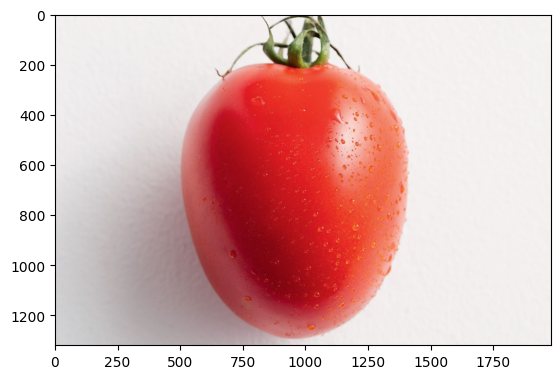

In [ ]:
img = Image.open("/content/drive/MyDrive/final_tomato_except2/data/user_feed/fresh02.jpg")
Prediction(img)

In [ ]:
# To convert an Xception model to a .tflite format and obtain the corresponding labels.txt file, you can follow the steps below:

# Step 1: Load the Xception model
# Assuming you have already trained and saved your Xception model in Keras, you can load the saved model using the tf.keras.models.load_model() function:

# python

import tensorflow as tf
model = tf.keras.models.load_model('/content/tomatos.h5')


In [ ]:
# Step 2: Convert the model to .tflite format
# You can use the TensorFlow Lite Converter to convert the saved Keras model to a TensorFlow Lite model:

# makefile

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


In [ ]:
# Step 3: Save the .tflite model to a file
# You can save the .tflite model to a file using the following code:

# python

with open('tomatoxcep_model.tflite', 'wb') as f:
  f.write(tflite_model)


In [ ]:
# Step 4: Generate the labels.txt file
# You can generate the labels.txt file by extracting the class names from the training data or by using the class_indices attribute of the Keras ImageDataGenerator used for training the model.

# python

# Method 1: Extract class names from the training data
train_data_dir = 'path_to_training_data_directory'
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')
class_names = list(train_generator.class_indices.keys())

# Method 2: Get class names from the Keras model
class_names = list(model.layers[-1].get_config()['class_names'])

# Save the class names to a file
with open('labels.txt', 'w') as f:
  for class_name in class_names:
    f.write(class_name + '\n')

# This should generate the converted_model.tflite file and the labels.txt file that you can use for inference in your TensorFlow Lite application.

In [ ]:
!pip install tensorflow
!pip install tflite-model-maker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.3/577.3 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.6/128.6 KB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import tensorflow as tf

keras_model = tf.keras.models.load_model('/content/tomatos.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
tflite_model = converter.convert()

In [ ]:
with open('tomato16fmodel.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
labels = ['at_risk tomato', 'fresh tomato', 'rotten tomato']  # replace this with the list of your actual labels

with open('tomatolabels.txt', 'w') as f:
    for label in labels:
        f.write(label + '\n')


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

model = tf.keras.models.load_model('/content/drive/MyDrive/tomato_except2/tomatos.h5')

#keras_file ="/content/drive/MyDrive/tomato_except2/tomatos.h5"

#tflite_model = converter.convert()
#open("finaltomato.tflite", "wb").write(tflite_model)

converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()



with tf.io.gfile.GFile('finaltomatoecep.tflite', 'wb') as f:

  f.write(tflite_model)


In [3]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the Xception model from the h5 file
model = load_model('/content/drive/MyDrive/final_tomato_except2/final_project_200_tomatos.h5')

# Load the test image
img_path = '/content/drive/MyDrive/final_tomato_except2/data/user_feed/fresh01.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Predict the class of the test image
preds = model.predict(x)
predicted_class = np.argmax(preds)

# Print the predicted class
print("Predicted class:", predicted_class)

1/1 [==============================] - 1s 762ms/step
Predicted class: 1
